In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import sklearn 
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Data Exploration

In [84]:
df=pd.read_csv(r"C:\Users\disha\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [85]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [86]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# histogram

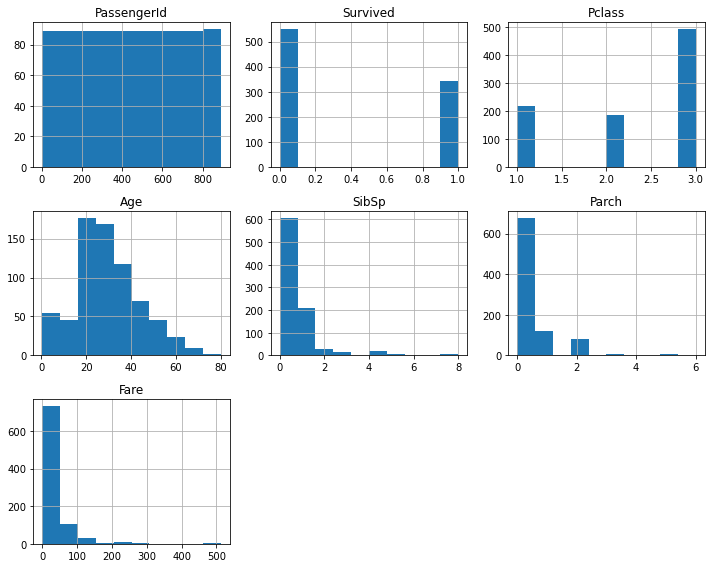

In [5]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Pairplot

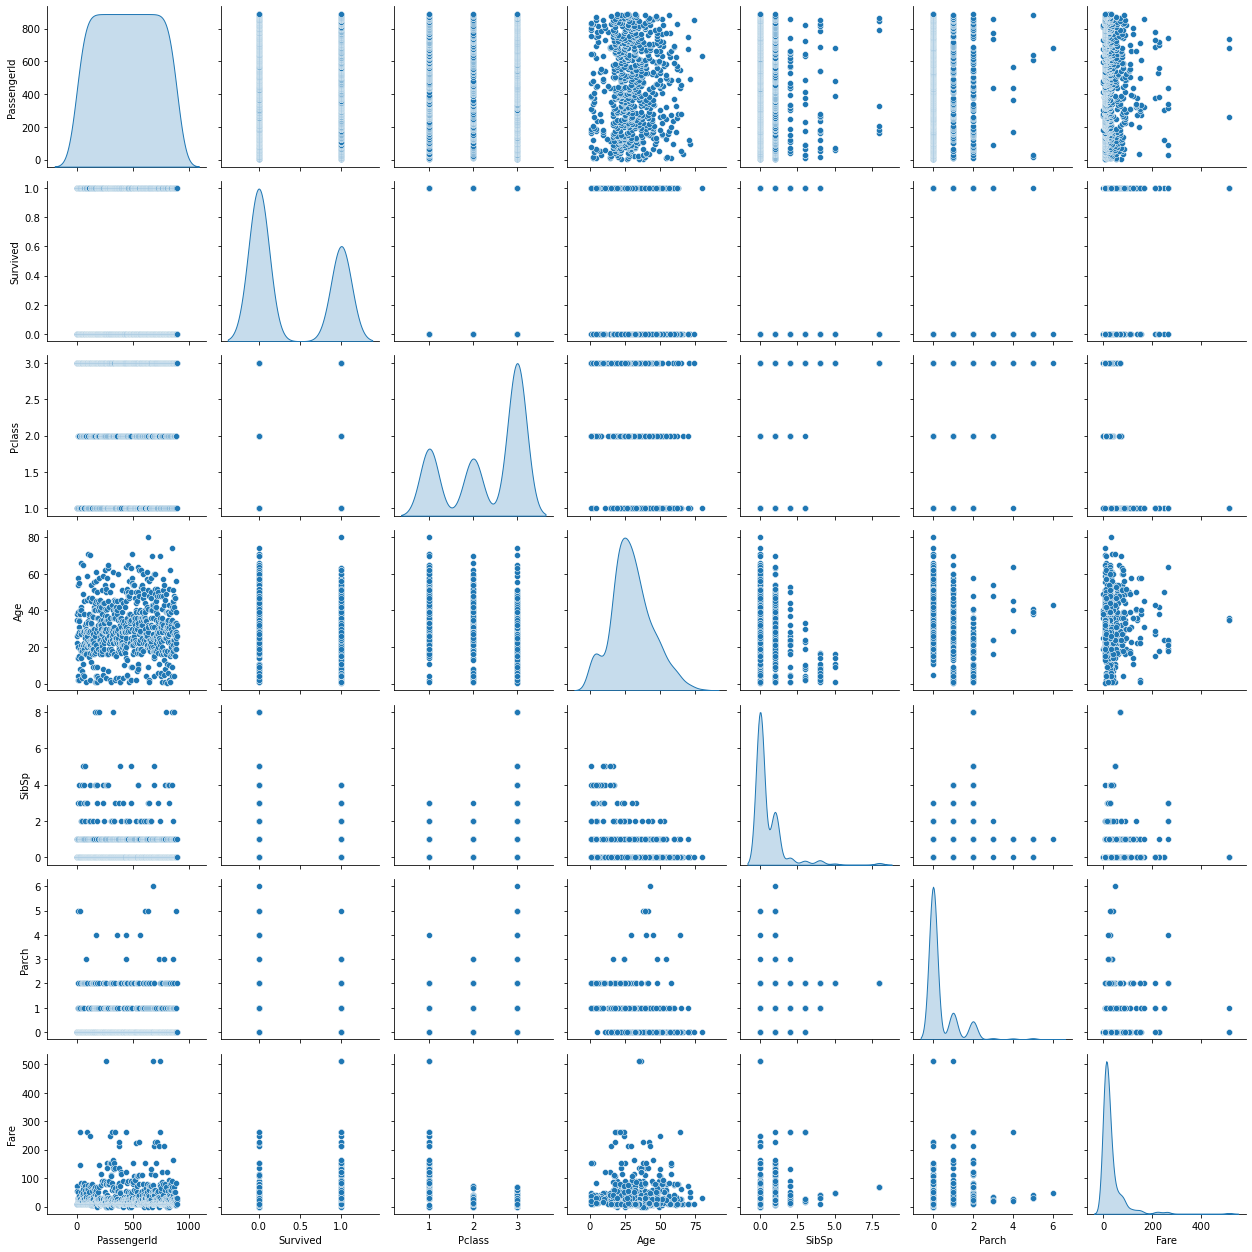

In [6]:
sns.pairplot(df, diag_kind='kde')
plt.tight_layout()
plt.show()

# Boxplot

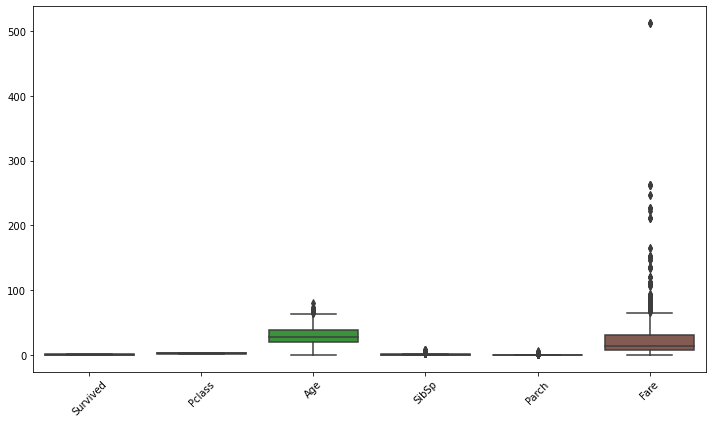

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['PassengerId']))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# correlation matrix

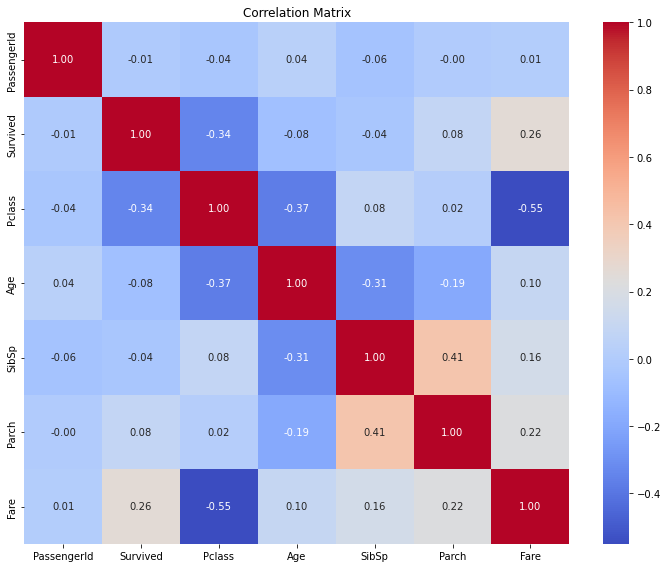

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [9]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols= df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Numerical Variables:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [94]:
print(df.isnull().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
print(df.isnull().sum())



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [91]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [12]:
df_encoded = pd.get_dummies(df, columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
print(df_encoded.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   
3            4         1       1  35.0      1      0  53.1000   
4            5         0       3  35.0      0      0   8.0500   

   Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   

   Name_Abbott, Mrs. Stanton (Rosa Hunt)  ...  Cabin_F G73  Cabin_F2  \
0                                      0  ...            0         0   
1                                      0  ...            0         0   
2 

# . Model Building

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

# Load the training dataset
train_file_path = r"C:\Users\disha\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv"
train_data = pd.read_csv(train_file_path)

# Handle missing values in the training set
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop columns that are not useful for prediction
train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Separate features and target variable from training data
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the scaler on the training data and store feature names
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
scaler_feature_names = X_train.columns.tolist()  # Store feature names

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
# Save the scaler and feature names
# Saving the scaler object


with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Loading the scaler object
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)



# Model Evaluation

In [3]:
# Load the test dataset
test_file_path = r"C:\Users\disha\Downloads\Logistic Regression\Logistic Regression\Titanic_test.csv"
test_data = pd.read_csv(test_file_path)

# Handle missing values in the test set
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Encode categorical variables
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop columns that are not useful for prediction
test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Ensure the test data has the same columns as the training data
missing_cols = set(X.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[X.columns]


In [4]:
# Standardize the test data using the fitted scaler
test_data = scaler.transform(test_data)


In [6]:
# Make predictions on the new test data
test_predictions = model.predict(test_data)
test_probabilities = model.predict_proba(test_data)[:, 1]


# Evaluating the model

In [58]:
# Evaluate the model on the validation set
y_pred_val = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
conf_matrix = confusion_matrix(y_val, y_pred_val)
class_report = classification_report(y_val, y_pred_val)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-score: 0.7638888888888888
ROC-AUC: 0.881981981981982
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Visualize the ROC curve

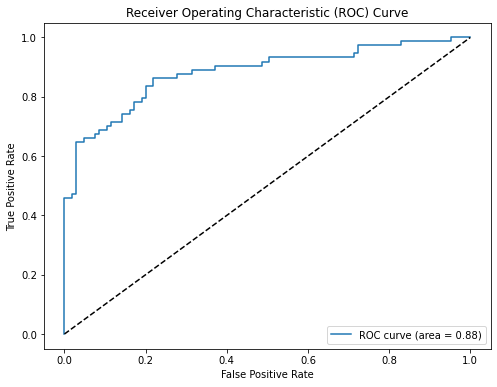

In [59]:
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# interpretation

In [67]:
feature_names = ["Age", "Fare", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
coefficients = model.coef_
for coef, feature in zip(coefficients[0], feature_names):
    print(f"{feature}: {coef}")


Age: -0.7853202591535184
Fare: -0.3960097002977899
Pclass: -0.3492775066023335
Sex: -0.09667307572590593
SibSp: 0.12657927474082167
Parch: -1.277179943304515
Embarked: -0.046344054724329634


Age: Older passengers tend to have lower survival probabilities.
Fare: Higher fares are associated with lower survival probabilities.
Pclass: Lower passenger class (higher Pclass values) corresponds to lower survival probabilities.
Sex: Being male decreases the survival probability compared to being female.
SibSp: Having more siblings/spouses aboard slightly increases the survival probability.
Parch: Having more parents/children aboard decreases the survival probability.
Embarked: Embarking from certain ports may have a slight effect on survival probability


In [95]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
